# Question 1

## Q1.1 generate data:
(a) $X=\left[-1, -0.99, -0.98, \ldots, 0.98, 0.99, 1\right]$ 
 
(b) $Y = 2\cdot X$
 
(c) write a function noise_var(v) which receives an array and adds **to each element** a sample from a normal distribution with mean 0 and variance 0.01. 

(d) using the function you wrote in clause (c) generate $X'$. Where $X'$ is a vector defined as following:
- for all $x_i\in X, x'_i\in X'$
- $ x'_i=x_i+n_i $ 
- $n_i\sim \mathcal{N}\left(0, 0.01\right)$ 

(d) Repeat the same process as in (d) to create $Y'$

In [6]:
import numpy as np
X = np.arange(-1, 1, .01)
Y = X * 2
def noise_var(v):

    noise_vector = np.random.normal(0,0.1, len(v))
    #print(noise_vector)
    return v + noise_vector

X_tag = noise_var(X)  
Y_tag = noise_var(Y)

    

## Q1.2
Are $X'$ and $Y'$ statistically dependent? what type of dependence? how can you show that? 

1. explain in words
2. show with math (in code)


*hint - most mathematical operations you encounter are already implemented in the Python libraries you know. Use them.*

1. yes - Y is dependent on X, so while the noise addition is independent there will be a dependent component

2.
$
X' = X + N_1(0,0.01)\\  
Y' = Y + N_2(0,0.01)\\  
cov(X',Y') = E((X'-E(X'))(Y'-E(Y'))) = E((X + N_1-E(X + N_1))(Y + N_2-E(Y + N_2)))=\\  
E(XY+N_1Y+N_2X + N_1N_2 = E(X*2X)) > 0\\  $

Therefore, since the covariance is non-zero, the vectors are linearly dependent




In [41]:

##with numpy:
print(np.corrcoef(X_tag, Y_tag))

##with pandas
pd.Series(X_tag).corr(pd.Series(Y_tag))
#Y_tag.corr(X_tag)

[[1.         0.98069233]
 [0.98069233 1.        ]]


0.9806923317774708

## correlation is 0.98

# Question 2


Load the data in movie_rating.csv into a dataframe. The data consists of critic ratings and people votes for a set of 20 movies.
## Q2.1
Compute the linear correlation between critic ratings and people votes


*hint - most mathematical operations you encounter are already implemented in the Python libraries you know. Use them.*

In [17]:
import pandas as pd
df = pd.read_csv('movie_rating.csv')
print(df.head())
df['people_vote'].corr(df['rating'])

   Unnamed: 0  people_vote    rating
0           0    60.000000  7.003429
1           1    73.812940  8.102049
2           2    87.096481  8.969485
3           3    70.698214  7.506635
4           4    71.963592  7.366683


0.3369534647828707

## Q2.2
(a) To explore the connection between critic ratings and people votes, draw them against each other in a scatter plot. 

Text(0,0.5,'rating')

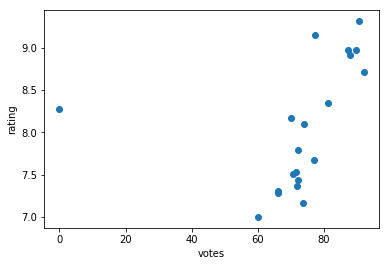

In [18]:
import matplotlib.pyplot as plt
plt.figure(1)
plt.scatter(df['people_vote'], df.rating)
plt.xlabel('votes')
plt.ylabel('rating')

(b) Create a new data frame, with all the movies, except the one with the lowest people vote. 

In [21]:
df2 = df.loc[df['people_vote'] > df['people_vote'].min()]

(c) Draw a scatter plot for the movies selected. Is there a linear connection? Explain.

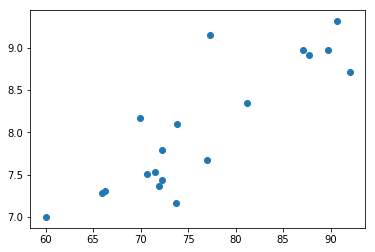

In [29]:
plt.figure(2)
plt.scatter(df2['people_vote'], df2['rating'])


## appears to be linear connection
## linear correlation at:

In [42]:
df2['people_vote'].corr(df2['rating'])

0.8609465459222099

(d) Congragulations you've encountered an outlier, a data point so far from the others, keeping it may adversely affect results. 
Linear correlation is sensitive to distance. Handling outliers is important and most cases are harder than this one, due to complexity (hunderds of variables), size (thousands of movies), etc. In this case a possible remedy would be to use order statistics or ranks (1st, 2nd,...).

$$
\small
X=\{100,0, 15, 50\}
\rightarrow
rank(X)=\{4, 1, 2, 3\}
$$

- Create a new data frame for all movies with all critic ratings replaced by their rank and the same for people vote. 
- Draw a scatter plot
- compute the linear correlation.

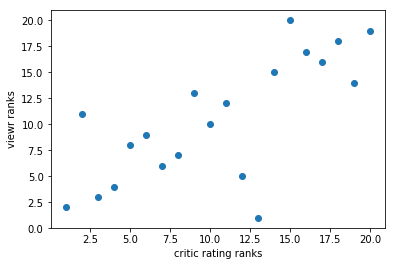

0.724812030075188


In [51]:
ranked_df = df.rank()
plt.figure(3)
plt.scatter(ranked_df['rating'], ranked_df['people_vote'])
plt.xlabel('critic rating ranks')
plt.ylabel('viewr ranks')
plt.show()
print(ranked_df['rating'].corr(ranked_df['people_vote']))

Correlation over ranks is named Spearman correlation.

# Question 3
Read the csv file bank-full.csv into a data frame. The description
of this data can be found in bank-info.txt

(a) Compute the Spearman correlation between days from last contact and previous campaign contacts

In [2]:
import matplotlib.pyplot as plt
import pandas as pd
bank_df = pd.read_csv('bank-full.csv')
bank_df

age            job   marital  education default_credit  balance  \
0       58     management   married   tertiary             no     2143   
1       44     technician    single  secondary             no       29   
2       33   entrepreneur   married  secondary             no        2   
3       47    blue-collar   married    unknown             no     1506   
4       33        unknown    single    unknown             no        1   
5       35     management   married   tertiary             no      231   
6       28     management    single   tertiary             no      447   
7       42   entrepreneur  divorced   tertiary            yes        2   
8       58        retired   married    primary             no      121   
9       43     technician    single  secondary             no      593   
10      41         admin.  divorced  secondary             no      270   
11      29         admin.    single  secondary             no      390   
12      53     technician   married  secondary             no        6   
13      58     technician   married    unknown             no       71   
14      57       services   married  secondary             no      162   
15      51        retired   married    primary             no      229   
16      45         admin.    single    unknown             no       13   
17      57    blue-collar   married    primary             no       52   
18      60        retired   married    primary             no       60   
19      33       services   married  secondary             no        0   
20      28    blue-collar   married  secondary             no      723   
21      56     management   married   tertiary             no      779   
22      32    blue-collar    single    primary             no       23   
23      25       services   married  secondary             no       50   
24      40        retired   married    primary             no        0   
25      44         admin.   married  secondary             no     -372   
26      39     management    single   tertiary             no      255   
27      52   entrepreneur   married  secondary             no      113   
28      46     management    single  secondary             no     -246   
29      36     technician    single  secondary             no      265   
...    ...            ...       ...        ...            ...      ...   
45181   46    blue-collar   married  secondary             no     6879   
45182   34     technician   married  secondary             no      133   
45183   70        retired   married    primary             no      324   
45184   63        retired   married  secondary             no     1495   
45185   60       services   married   tertiary             no     4256   
45186   59        unknown   married    unknown             no     1500   
45187   32       services    single  secondary             no     1168   
45188   29     management    single  secondary             no      703   
45189   25       services    single  secondary             no      199   
45190   32    blue-collar   married  secondary             no      136   
45191   75        retired  divorced   tertiary             no     3810   
45192   29     management    single   tertiary             no      765   
45193   28  self-employed    single   tertiary             no      159   
45194   59     management   married   tertiary             no      138   
45195   68        retired   married  secondary             no     1146   
45196   25        student    single  secondary             no      358   
45197   36     management    single  secondary             no     1511   
45198   37     management   married   tertiary             no     1428   
45199   34    blue-collar    single  secondary             no     1475   
45200   38     technician   married  secondary             no      557   
45201   53     management   married   tertiary             no      583   
45202   34         admin.    single  secondary             no      557   
45203   23 

(b) Is there an actual linear correlation between the ranks? Explain, and back your claims with math and plots. 

In [7]:
ranked_bank_df = bank_df.rank()

ranked_bank_df

age      job  marital  education  default_credit  balance  \
0      42287.5  22359.5  18814.5    36704.0         22198.5  37205.0   
1      28979.5  39822.0  38816.5    18452.5         22198.5   9412.5   
2      12097.5  15647.0  18814.5    18452.5         22198.5   7553.5   
3      32482.5  10037.5  18814.5    44283.0         22198.5  34347.5   
4      12097.5  45067.5  38816.5    44283.0         22198.5   7378.0   
5      15960.5  22359.5  18814.5    36704.0         22198.5  16899.0   
6       3569.5  22359.5  38816.5    36704.0         22198.5  22583.0   
7      26629.5  15647.0   2604.0    36704.0         44804.0   7553.5   
8      42287.5  28220.5  18814.5     3426.0         22198.5  13209.0   
9      27831.0  39822.0  38816.5    18452.5         22198.5  25395.5   
10     25363.0   2586.0   2604.0    18452.5         22198.5  18033.0   
11      4681.0   2586.0  38816.5    18452.5         22198.5  21298.0   
12     38249.0  39822.0  18814.5    18452.5         22198.5   8061.5   
13     42287.5  39822.0  18814.5    44283.0         22198.5  11254.5   
14     41503.5  33008.5  18814.5    18452.5         22198.5  14646.0   
15     36424.5  28220.5  18814.5     3426.0         22198.5  16829.0   
16     30155.5   2586.0  38816.5    44283.0         22198.5   8524.0   
17     41503.5  10037.5  18814.5     3426.0         22198.5  10451.5   
18     43725.5  28220.5  18814.5     3426.0         22198.5  10800.5   
19     12097.5  33008.5  18814.5    18452.5         22198.5   5523.5   
20      3569.5  10037.5  18814.5    18452.5         22198.5  27432.0   
21     40700.5  22359.5  18814.5    36704.0         22198.5  28154.0   
22     10069.0  10037.5  38816.5     3426.0         22198.5   9091.0   
23      1073.0  33008.5  18814.5    18452.5         22198.5  10359.5   
24     24040.0  28220.5  18814.5     3426.0         22198.5   5523.5   
25     28979.5   2586.0  18814.5    18452.5         22198.5   1141.0   
26     22619.0  22359.5  38816.5    36704.0         22198.5  17592.5   
27     37348.0  15647.0  18814.5    18452.5         22198.5  12953.5   
28     31351.0  22359.5  38816.5    18452.5         22198.5   1787.5   
29     17810.5  39822.0  38816.5    18452.5         22198.5  17902.0   
...        ...      ...      ...        ...             ...      ...   
45181  31351.0  10037.5  18814.5    18452.5         22198.5  43532.0   
45182  14048.5  39822.0  18814.5    18452.5         22198.5  13645.5   
45183  44691.0  28220.5  18814.5     3426.0         22198.5  19637.0   
45184  44289.0  28220.5  18814.5    18452.5         22198.5  34278.5   
45185  43725.5  33008.5  18814.5    36704.0         22198.5  41589.0   
45186  43042.5  45067.5  18814.5    44283.0         22198.5  34313.5   
45187  10069.0  33008.5  38816.5    18452.5         22198.5  32023.0   
45188   4681.0  22359.5  38816.5    18452.5         22198.5  27152.5   
45189   1073.0  33008.5  38816.5    18452.5         22198.5  15863.5   
45190  10069.0  10037.5  18814.5    18452.5         22198.5  13748.0   
45191  44931.0  28220.5   2604.0    36704.0         22198.5  41050.0   
45192   4681.0  22359.5  38816.5    36704.0         22198.5  27975.0   
45193   3569.5  30142.0  38816.5    36704.0         22198.5  14546.5   
45194  43042.5  22359.5  18814.5    36704.0         22198.5  13823.5   
45195  44595.5  28220.5  18814.5    18452.5         22198.5  31836.0   
45196   1073.0  35554.5  38816.5    18452.5         22198.5  20511.0   
45197  17810.5  22359.5  38816.5    18452.5         22198.5  34376.5   
45198  19561.5  22359.5  18814.5    36704.0         22198.5  33911.0   
45199  14048.5  10037.5  38816.5    18452.5         22198.5  34183.5   
45200  21142.5  39822.0  18814.5    18452.5         22198.5  24761.0   
45201  38249.0  22359.5  18814.5    36704.0         22198.5  25225.5   
45202  14048.5   2586.0  38816.5    18452.5         22198.5  24761.0   
45203    406.5  35554.5  38816.5    36704.0         22198.5  12953.5   
45204  44852.5  28220.5  18814.5    18452.5        

In [4]:
ranked_bank_df['days_from_last_contact'].corr(ranked_bank_df['previous_campaign_contacts'])

0.985644638244494

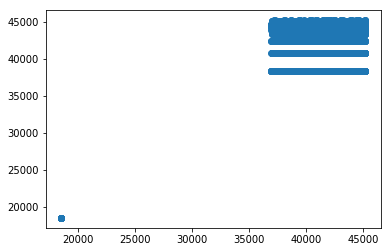

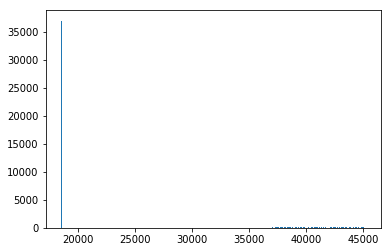

In [6]:
plt.figure(4)
plt.scatter(ranked_bank_df['days_from_last_contact'],ranked_bank_df['previous_campaign_contacts'])
plt.show()
plt.hist(ranked_bank_df['days_from_last_contact'], bins = 500)#,bank_df['days_from_last_contact'])
plt.show()


## it appears that the no-contact group is skewing the results, with a correlation of 0.98. We'll try without them:

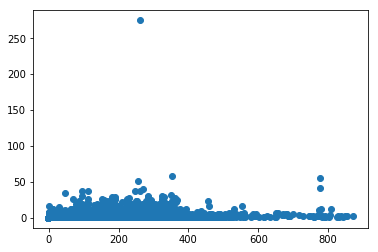

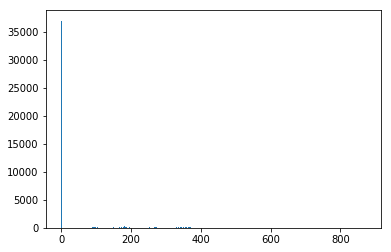

0.4548196354804639


In [9]:
no_zeros_bank = bank_df[ranked_bank_df.previous_campaign_contacts != 0]
ranked_no_zeros = no_zeros_bank.rank()

plt.figure(4)
plt.scatter(no_zeros_bank['days_from_last_contact'],no_zeros_bank['previous_campaign_contacts'])
plt.show()
plt.hist(no_zeros_bank['days_from_last_contact'], bins = 500)#,bank_df['days_from_last_contact'])
plt.show()
print(no_zeros_bank.days_from_last_contact.corr(no_zeros_bank.previous_campaign_contacts))

## by getting rid of the no-contacts, we get a clear picture of virtually zero linear correlation